In [32]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets


In [58]:
dataset = pd.read_csv("D:\ENR\datasets\Advertising.csv")
print(dataset.head(5))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [59]:
r, c = dataset.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
#del dataset

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size,random_state=seed)
del X
del Y

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

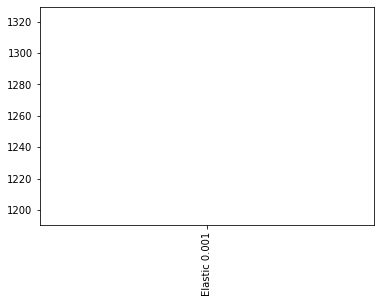

In [60]:
#Evaluation of various combinations of ElasticNet LinearRegression

#Import the library
from sklearn.linear_model import ElasticNet

#Add the alpha value to the below list if you want to run the algo
a_list = np.array([])

for alpha in a_list:
    #Set the base model
    model = ElasticNet(alpha=alpha,random_state=seed)
    
    algo = "Elastic"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

if (len(a_list)==0):
    mae.append(1260)
    comb.append("Elastic" + " %s" % 0.001 )
    
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    


In [61]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_val, Y_val)
y_pred3 = enet.predict(X_val)

In [62]:
mse3 = np.mean((y_pred3 - Y_val)**2)
print("Mean Squared Error:", mse3)

Mean Squared Error: 3.7117134057735677
